# Scikit-Learn usage examples

## Import required modules

In [31]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

## Simple Linear Regression

[1.9776566]
-0.9033107255311146


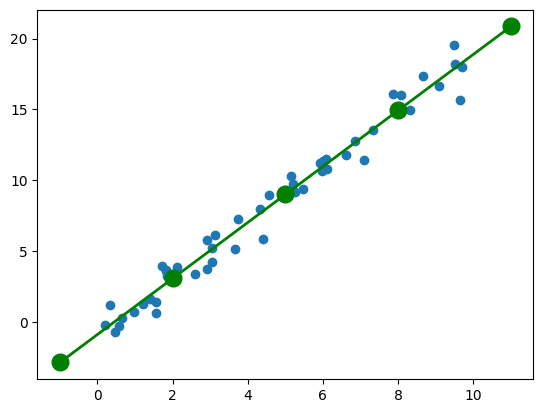

In [35]:
# Generate data for analysis
rng = np.random.RandomState(42)
x = 10 * rng.rand(50)
y = 2 * x - 1 + rng.randn(50)

# Choose a class of model and its hyperparameters
model = LinearRegression(fit_intercept=True)

# Arrange data into a features matrix and target vector
X = x[:, np.newaxis]

# Fit the model to the data
model.fit(X, y)
print(model.coef_)
print(model.intercept_)

# Predict labels for unknown data
xfit = np.linspace(-1, 11, 5)
Xfit = xfit[:, np.newaxis]
yfit = model.predict(Xfit)
plt.tight_layout()
plt.scatter(x, y)
plt.plot(xfit, yfit, color='green', marker='o', linewidth=2, markersize=12);
plt.savefig('./output/LinearRegression.png')

## Gaussian naive Bayes, Iris Classification

<class 'pandas.core.frame.DataFrame'>
   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa
(150, 5)
0.9736842105263158


<Figure size 640x480 with 0 Axes>

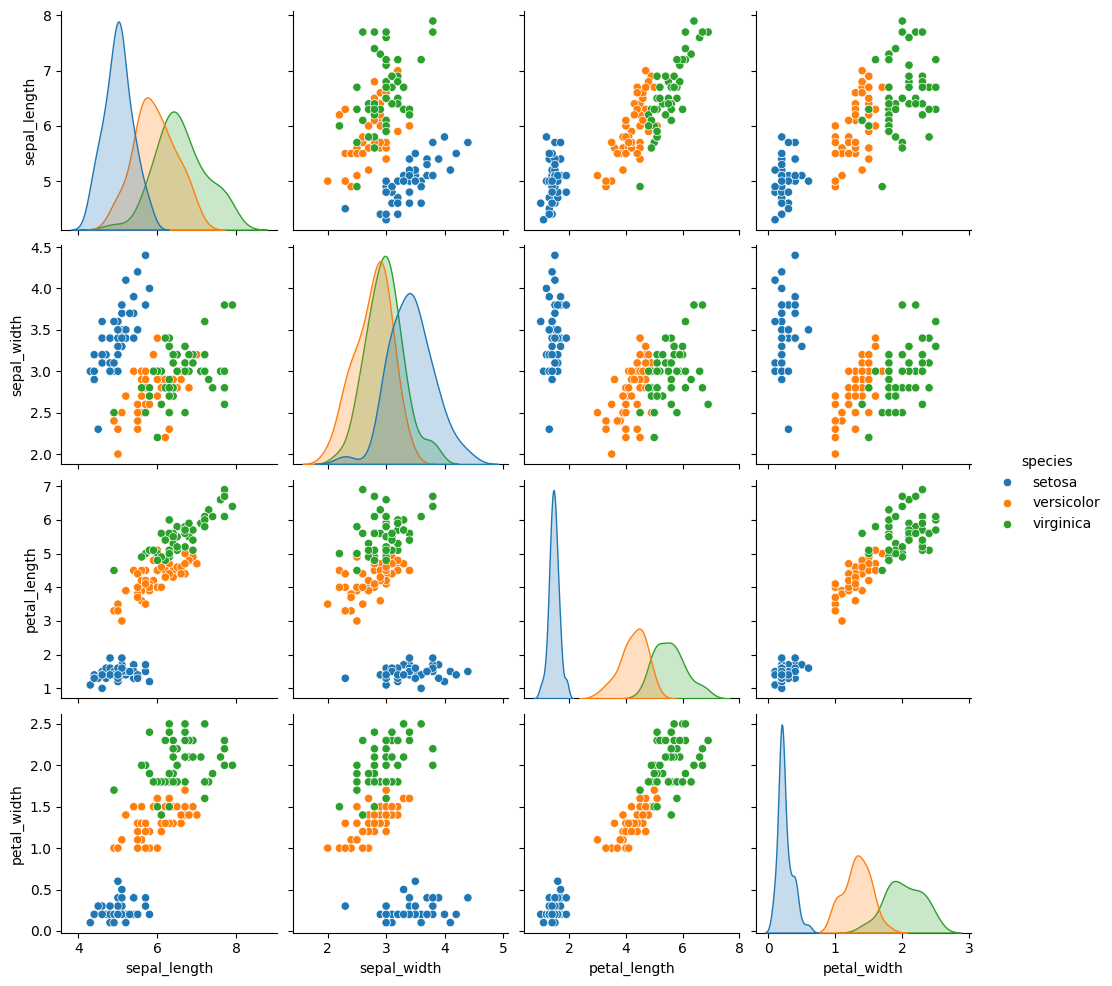

In [36]:
# Load data for analysis
iris = sns.load_dataset('iris')
print(type(iris))
print(iris.head())
print(iris.shape)
plt.tight_layout()
sns.pairplot(iris, hue='species', height=2.5)
plt.savefig('./output/GaussianNB.png')

# #xtract the features matrix and target array
X_iris = iris.drop('species', axis=1)
y_iris = iris['species']

# Split the data into a training set and a testing set
Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris, random_state=1)

# Instantiate model
model = GaussianNB()

# Fit model to data
model.fit(Xtrain, ytrain)

# Predict on new data
y_model = model.predict(Xtest)

# Check accuracy of the model
print(accuracy_score(ytest, y_model))